## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [2]:
df = pd.read_csv('tweet_emotions.csv', delimiter=',')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


# Understanding the dataset by Performing Exploratory Data Analysis

In [3]:
def EDA(df, row_limit=5, list_elements_limit=10):
    
    #------------------------------- Number of Rows and Columns --------------------------
    print('Information of Number of Variables and Number of Observations :')
    print('\nColumn_Info : There are {} columns in the dataset'.format(df.shape[1]))
    print('Row_Info : There are {} rows in the dataset'.format(df.shape[0]))
    
    print("==============================================================================================================")
    
    #------------------- Categorical and Numberical Datatypes--------------------------------
    print("\nData type information of different variables :")
    df_dtypes = pd.DataFrame(df.dtypes).reset_index().rename(columns={0:'dtype', 'index':'column_name'})
    categorical = df_dtypes[df_dtypes['dtype']=='object']
    numerical = df_dtypes[df_dtypes['dtype']!='object']
    print('\nCategorical_Variable_Info : There are {} categorical columns'.format(len(categorical)))
    print('Numerical_Variable_Info : There are {} numerical columns'.format(len(df_dtypes)-len(categorical)))
    
    #--------------------- dtypes_df['dtype'].value_counts().plot.bar()-------------------------
    display(df_dtypes.head(row_limit))
    
    if list_elements_limit >= len(categorical):
        print("Categorical columns : ", list(categorical['column_name']))
    else:
        print("Categorical columns : ", list(categorical['column_name'])[:list_elements_limit])
        
    if list_elements_limit >= len(numerical):
        print("Numerical columns : ", list(numerical['column_name']))
    else:
        print("Numerical columns : ", list(numerical['column_name'])[:list_elements_limit])
        
        
    print("==============================================================================================================")
    print("\nChecking for Missing Values :")
    print('\n',df.isnull().sum())
    
    
    print("==============================================================================================================")
    print("\nDescription of numerical variables :")
    
    #------------------------------------ Describing numerical columns -----------------------
    desc_numerical = df[list(numerical['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_numerical.head(row_limit))
    
    print("==============================================================================================================")
    print("\nDescription of categorical variables")
    
    #------------------------------------ Describing categorical columns -----------------------
    desc_categorical = df[list(categorical['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_categorical.head(row_limit))
    
    return

EDA(df)

Information of Number of Variables and Number of Observations :

Column_Info : There are 3 columns in the dataset
Row_Info : There are 40000 rows in the dataset

Data type information of different variables :

Categorical_Variable_Info : There are 2 categorical columns
Numerical_Variable_Info : There are 1 numerical columns


,column_name,dtype
0,tweet_id,int64
1,sentiment,object
2,content,object


Categorical columns :  ['sentiment', 'content']
Numerical columns :  ['tweet_id']

Checking for Missing Values :

 tweet_id     0
sentiment    0
content      0
dtype: int64

Description of numerical variables :


,column_name,count,mean,std,min,25%,50%,75%,max
0,tweet_id,40000.0,1.845184e+09,1.188579e+08,1.693956e+09,1.751431e+09,1.855443e+09,1.962781e+09,1.966441e+09



Description of categorical variables


,column_name,count,unique,top,freq
0,sentiment,40000,13,neutral,8638
1,content,40000,39827,I just received a mothers day card from my lov...,14


# Visualization using Seaborn - Countplot and Pie chart for Data Analysis

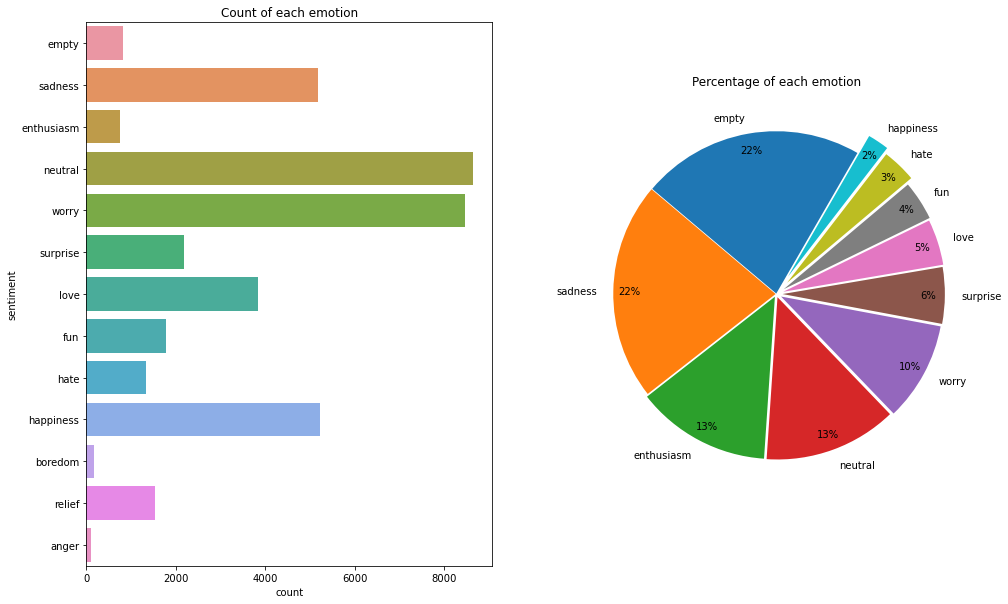

In [4]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,10))
explode = list((np.array(list(df['sentiment'].value_counts()))/sum(list(df['sentiment'].value_counts())))[::-1])[:10]
labels = list(df['sentiment'].unique())[:10]
sizes = df['sentiment'].value_counts()[:10]

#Pie chart to show the Percentage of each emotion present
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)

#Count plot to show the actual count of each emotion
sns.countplot(y ='sentiment', data = df, ax=ax1)

ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

### From the above plot, we can see that there are 13 different classes and few of them are having very few counts (i.e. Anger, Boredom, Empty etc...). This make the dataset imbalanced and it will not allow the model to converge. We will reduce the number of classes as follows.

In [5]:
other = (lambda x : x if x in ['happiness', 'sadness', 'worry', 'neutral', 'love'] else "other")
df['sentiment'] = df['sentiment'].apply(other)

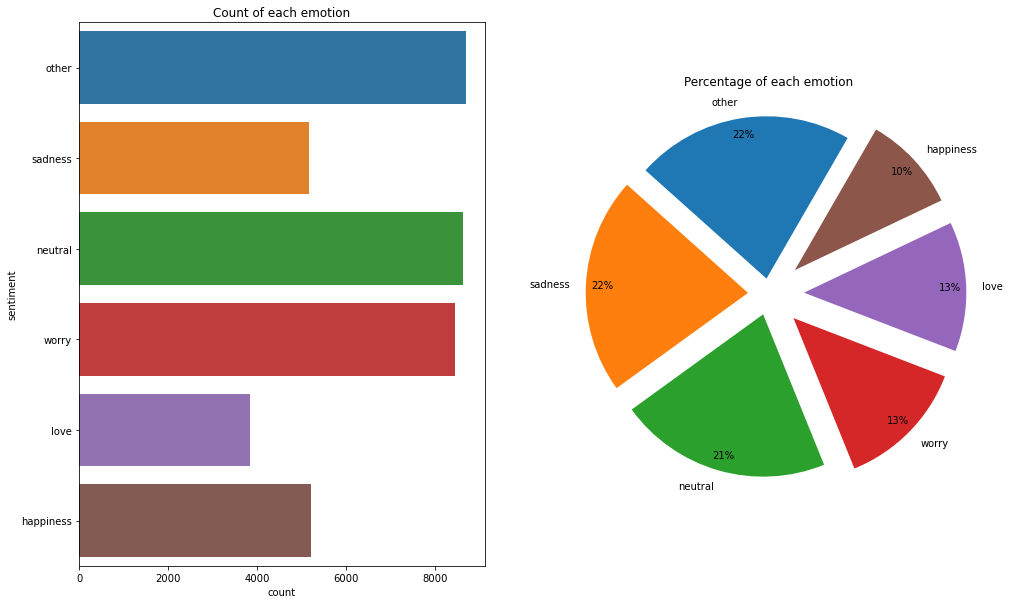

In [6]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,10))
explode = list((np.array(list(df['sentiment'].value_counts()))/sum(list(df['sentiment'].value_counts())))[::-1])[:10]
labels = list(df['sentiment'].unique())[:10]
sizes = df['sentiment'].value_counts()[:10]

#Pie chart to show the Percentage of each emotion present
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)

#Count plot to show the actual count of each emotion
sns.countplot(y ='sentiment', data = df, ax=ax1)

ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

### Above, we have grouped categories except ['happiness', 'sadness', 'worry', 'neutral', 'love'] as "other".                We have reduced Number of classes from 13 to 6.

In [7]:
df['char_length'] = df['content'].apply(lambda x : len(x))
df['token_length'] = df['content'].apply(lambda x : len(x.split(" ")))

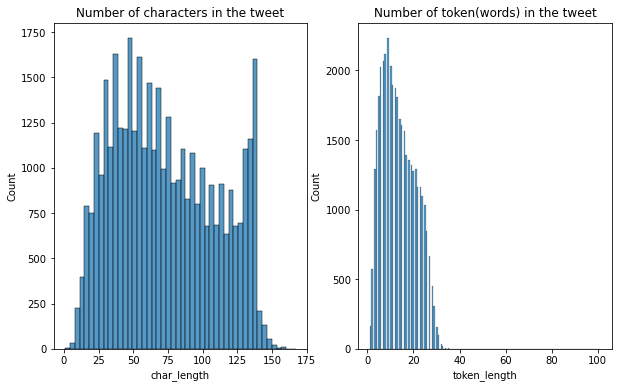

In [8]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
sns.histplot(df['char_length'], ax=ax1)
sns.histplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

## Analysis of distribution of character length and token length based on Top 5 sentiments

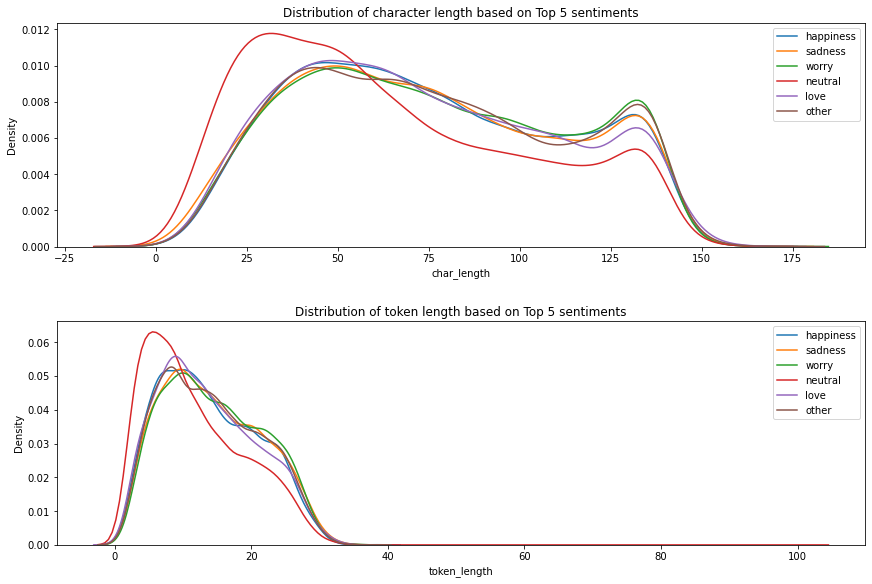

In [9]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1,figsize=(12,8),constrained_layout = True)
senti = ['happiness', 'sadness', 'worry', 'neutral', 'love','other']

for sentiment in senti:
    sns.kdeplot(df[df['sentiment']==sentiment]['char_length'],ax=ax1, label=sentiment)
for sentiment in senti:
    sns.kdeplot(df[df['sentiment']==sentiment]['token_length'],ax=ax2, label=sentiment)    

ax1.legend()
ax1.set_title("Distribution of character length based on Top 5 sentiments")
ax2.legend()
ax2.set_title("\nDistribution of token length based on Top 5 sentiments")
plt.show()

## Inferences :
    1. There are 13 different emotions, few of them are having very few counts (i.e. Anger, Boredom, Empty etc...). This make the dataset imbalanced. To overcome this, we'll reduce the number of classes.
        Grouped categories except ['happiness', 'sadness', 'worry', 'neutral', 'love'] as "other"
    2. "Neurtal" and "Worry" are the most frequent emotions in the dataset.
    3.  Majority of the tweets have around 45 characters.
    4.  The most frequent words(token) length is around 10.
    5.  People with "empty" and "neutral" emotions write smaller tweet.